In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('covid_19_data.csv')
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
imputer = SimpleImputer(strategy='constant')
dfi = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
dfg = dfi.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()
dfg

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
...,...,...,...,...,...
87276,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0
87277,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0
87278,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0
87279,occupied Palestinian territory,2020-03-16,0.0,0.0,0.0


In [30]:
# To count how many unique values there is
countries = dfg['Country'].unique()
len(countries)

229

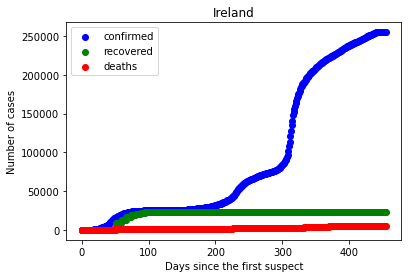

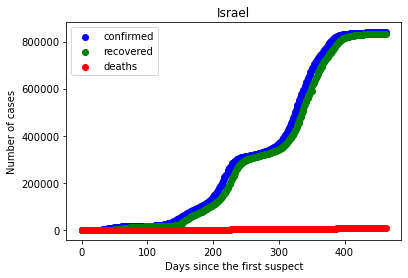

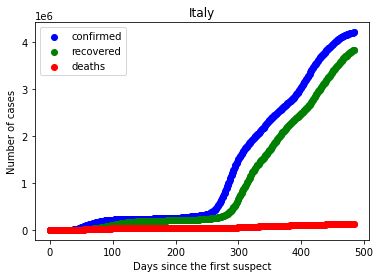

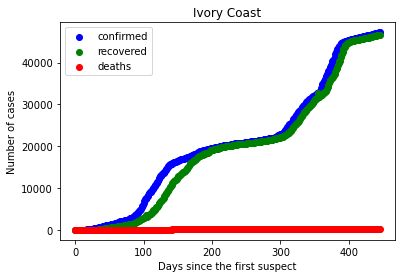

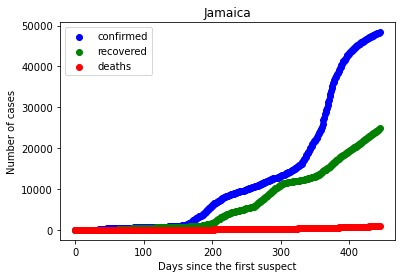

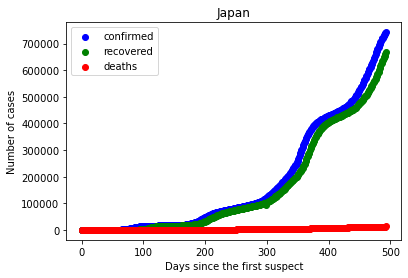

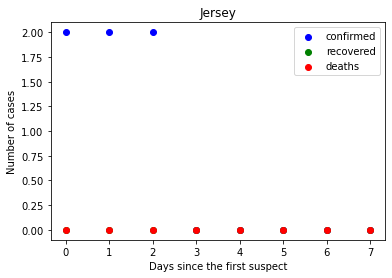

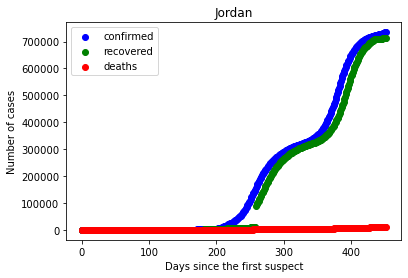

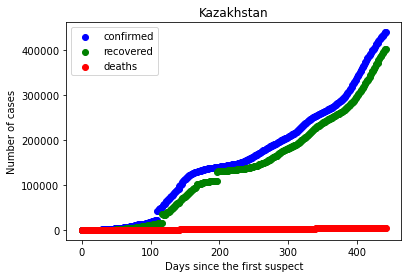

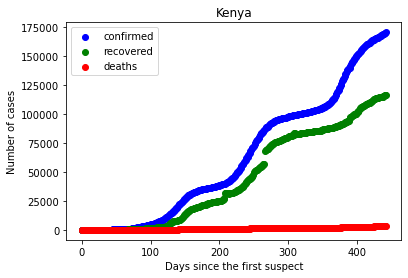

In [39]:
for idx in range(100,110): # we could loop through all unique countries with range(0,len(countries)), but here we'll just show a few
    C = dfg[dfg['Country']==countries[idx]].reset_index() # we take the data related to one country
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='b',label='confirmed') # x-axis the number of times a record of a country appears, i.e. the nb of days
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='g',label='recovered') # y-axis is confirmed, recovered and deaths cases
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='r',label='deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show() # show a graph for each country

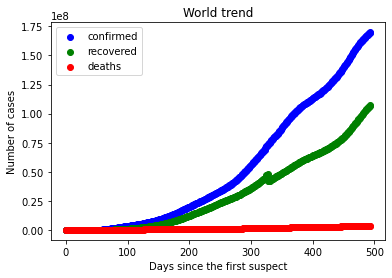

In [37]:
# To show the trend for the world
days = dfg['Date'].unique()
dfw = dfi.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()
plt.scatter(np.arange(0,len(days)),dfw['Confirmed'],color='b',label='confirmed')
plt.scatter(np.arange(0,len(days)),dfw['Recovered'],color='g',label='recovered')
plt.scatter(np.arange(0,len(days)),dfw['Deaths'],color='r',label='deaths')
plt.title('World trend')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()